In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
import json
import re

In [2]:
# I load the json file to be sure to import all elements without any error
data = pd.read_json('les-arbres.json', orient='records')

In [3]:
# I explore the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14322 entries, 0 to 14321
Data columns (total 5 columns):
datasetid           14322 non-null object
recordid            14322 non-null object
fields              14322 non-null object
geometry            14322 non-null object
record_timestamp    14322 non-null object
dtypes: object(5)
memory usage: 559.6+ KB


In [4]:
# I look at the types of features
data.dtypes

datasetid           object
recordid            object
fields              object
geometry            object
record_timestamp    object
dtype: object

In [5]:
# I look at nan values
data.isnull().sum()

datasetid           0
recordid            0
fields              0
geometry            0
record_timestamp    0
dtype: int64

In [6]:
# I display some rows of the dataset
data.tail()

,datasetid,recordid,fields,geometry,record_timestamp
14317,les-arbres,b595294b352f8808e56a27eae64b7fd5a2932f06,"{'libellefrancais': 'Marronnier', 'idemplaceme...","{'type': 'Point', 'coordinates': [2.3793102616...",2019-11-08T10:01:20.116+01:00
14318,les-arbres,37639fed2bf810835c5340e5ae9d289f82a6d778,"{'libellefrancais': 'Platane', 'idemplacement'...","{'type': 'Point', 'coordinates': [2.3915097401...",2019-11-08T10:01:20.116+01:00
14319,les-arbres,250a1ffb5c10b80f8a3f2e71391e0f0fd2540361,"{'libellefrancais': 'Platane', 'idemplacement'...","{'type': 'Point', 'coordinates': [2.3910116630...",2019-11-08T10:01:20.116+01:00
14320,les-arbres,9c489ffd9f15d89d613809e148b04535305ee175,"{'libellefrancais': 'Peuplier', 'idemplacement...","{'type': 'Point', 'coordinates': [2.3847010452...",2019-11-08T10:01:20.116+01:00
14321,les-arbres,770ef66ad0eac69de0b2895c8178feea8a849d78,"{'libellefrancais': 'Platane', 'idemplacement'...","{'type': 'Point', 'coordinates': [2.3813920073...",2019-11-08T10:01:20.116+01:00


In [7]:
# I look at the numbers of rows and columns
data.shape

(14322, 5)

In [8]:
from pandas.io.json import json_normalize

# I parse the 'fields' feature where all data are stored
trees = json_normalize(data['fields'])
trees.head()

,libellefrancais,idemplacement,domanialite,circonferenceencm,hauteurenm,espece,adresse,geo_point_2d,arrondissement,stadedeveloppement,remarquable,idbase,genre,typeemplacement,varieteoucultivar,complementadresse
0,Platane,000101007,Alignement,35.0,5.0,x hispanica,BOULEVARD MACDONALD,"[48.8966273942, 2.39279835434]",PARIS 19E ARRDT,J,0,2008523.0,Platanus,Arbre,NaN,NaN
1,Cerisier à fleurs,M0840005,Jardin,80.0,6.0,sargentii,PARC DES BUTTES CHAUMONT,"[48.879291788, 2.382417251949999]",PARIS 19E ARRDT,NaN,NaN,103169.0,Prunus,Arbre,NaN,NaN
2,Erable,000104008,Alignement,35.0,4.0,campestre,JARDINIERES DU QUAI DU LOT / QUAI DU LOT,"[48.8997481873, 2.38110864573]",PARIS 19E ARRDT,J,0,2027978.0,Acer,Arbre,NaN,NaN
3,If,F0300034,Jardin,70.0,0.0,baccata,PARC DES BUTTES CHAUMONT,"[48.8818654713, 2.38473721565]",PARIS 19E ARRDT,NaN,NaN,103289.0,Taxus,Arbre,NaN,NaN
4,Tilleul,00000071,Jardin,105.0,0.0,x europaea,JARDIN ILOT RIQUET,"[48.8898949051, 2.37264376961]",PARIS 19E ARRDT,NaN,NaN,139834.0,Tilia,Arbre,''Euchlora'',NaN


In [9]:
# I look at the types of features
trees.dtypes

libellefrancais        object
idemplacement          object
domanialite            object
circonferenceencm     float64
hauteurenm            float64
espece                 object
adresse                object
geo_point_2d           object
arrondissement         object
stadedeveloppement     object
remarquable            object
idbase                float64
genre                  object
typeemplacement        object
varieteoucultivar      object
complementadresse      object
dtype: object

In [10]:
# I look at nan values
trees.isnull().sum()

libellefrancais          87
idemplacement             0
domanialite               0
circonferenceencm         0
hauteurenm                0
espece                  140
adresse                   0
geo_point_2d              0
arrondissement            0
stadedeveloppement     4897
remarquable            3612
idbase                    0
genre                     0
typeemplacement           0
varieteoucultivar     11789
complementadresse     13283
dtype: int64

In [11]:
#I drop columns with less than 10% of values
trees.drop(columns = ['varieteoucultivar',  'complementadresse'], axis = 1, inplace = True)

In [12]:
#I drop rows with nan values
trees.dropna(subset=['libellefrancais', 'espece', 'stadedeveloppement', 'remarquable'], inplace = True)

In [13]:
# I check if the dataset has no more nan values
trees.isna().sum()

libellefrancais       0
idemplacement         0
domanialite           0
circonferenceencm     0
hauteurenm            0
espece                0
adresse               0
geo_point_2d          0
arrondissement        0
stadedeveloppement    0
remarquable           0
idbase                0
genre                 0
typeemplacement       0
dtype: int64

In [14]:
print(trees.typeemplacement.value_counts())
print(trees.arrondissement.value_counts())

Arbre    9249
Name: typeemplacement, dtype: int64
PARIS 19E ARRDT    9249
Name: arrondissement, dtype: int64


In [15]:
#I drop columns with same values in or id values
trees.drop(columns = ['arrondissement','typeemplacement', 'idemplacement'], axis = 1, inplace = True)

In [16]:
# For those features, I create a list with values appearing more than 2 times 
col = ['libellefrancais','domanialite','circonferenceencm', 'hauteurenm', 'espece']
values = []
for c in col:
    values.append(list(trees[c].value_counts()[trees[c].value_counts() > 2].index))
    
# I only keep features with the values appearing more than 2 times 
for i in range(len(values)):
    trees = trees[trees[col[i]].isin(values[i])]

In [17]:
# I drop those features that I consider non relevant for the modeling process
trees.drop(columns = ['remarquable', 'genre','idbase', 'adresse'], axis =1, inplace  = True)

In [18]:
# I look at 'n. sp.' values (equivalent of nan values)
# trees.eq('n. sp.').sum()

In [19]:
# I drop all rows with 
# trees = trees[trees.espece != 'n. sp.']

In [20]:
#len(trees.libellefrancais.unique())

In [21]:
# I create 2 features to collect coordinates values from the 'geo_point_2d' feature
latitude = []
longitude = []

for val in trees.geo_point_2d:
    lat = val.pop(0)
    lon = val.pop(0)
    latitude.append(lat)
    longitude.append(lon)

In [22]:
#print(latitude)
#print(longitude)

In [23]:
# I can now assign the list to the columns values
trees['latitude'] = latitude
trees['longitude'] = longitude

In [24]:
trees.drop(columns = ['geo_point_2d'], axis = 1, inplace = True)

In [25]:
trees.head()

,libellefrancais,domanialite,circonferenceencm,hauteurenm,espece,stadedeveloppement,latitude,longitude
0,Platane,Alignement,35.0,5.0,x hispanica,J,48.896627,2.392798
2,Erable,Alignement,35.0,4.0,campestre,J,48.899748,2.381109
5,Tilleul,DASCO,45.0,5.0,n. sp.,J,48.884806,2.390669
7,Marronnier,Alignement,75.0,10.0,x carnea,JA,48.896341,2.378369
10,Erable,Alignement,120.0,10.0,pseudoplatanus,A,48.890593,2.399003


In [26]:
# I prepare the dataset by getting dummies of 1 feature
new_trees = pd.get_dummies(data = trees, columns=['domanialite'], drop_first = False)
new_trees

,libellefrancais,circonferenceencm,hauteurenm,espece,stadedeveloppement,latitude,longitude,domanialite_Alignement,domanialite_DASCO,domanialite_DFPE,domanialite_DJS,domanialite_Jardin,domanialite_PERIPHERIQUE
0,Platane,35.0,5.0,x hispanica,J,48.896627,2.392798,1,0,0,0,0,0
2,Erable,35.0,4.0,campestre,J,48.899748,2.381109,1,0,0,0,0,0
5,Tilleul,45.0,5.0,n. sp.,J,48.884806,2.390669,0,1,0,0,0,0
7,Marronnier,75.0,10.0,x carnea,JA,48.896341,2.378369,1,0,0,0,0,0
10,Erable,120.0,10.0,pseudoplatanus,A,48.890593,2.399003,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,Marronnier,150.0,15.0,hippocastanum,A,48.889867,2.379310,0,1,0,0,0,0
14318,Platane,100.0,15.0,n. sp.,A,48.888527,2.391510,1,0,0,0,0,0
14319,Platane,150.0,20.0,x hispanica,A,48.884311,2.391012,1,0,0,0,0,0
14320,Peuplier,170.0,18.0,x canadensis,A,48.895184,2.384701,1,0,0,0,0,0


In [27]:
# I look at features names for further actions on features
new_trees.columns

Index(['libellefrancais', 'circonferenceencm', 'hauteurenm', 'espece',
       'stadedeveloppement', 'latitude', 'longitude', 'domanialite_Alignement',
       'domanialite_DASCO', 'domanialite_DFPE', 'domanialite_DJS',
       'domanialite_Jardin', 'domanialite_PERIPHERIQUE'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFF1429488>,
      dtype=object)

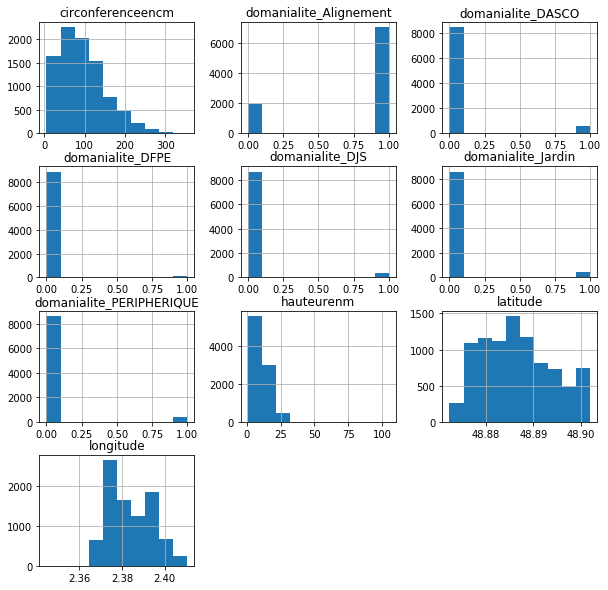

In [28]:
# I visualize the distribution of numeric series
new_trees.hist(figsize=(10,10))

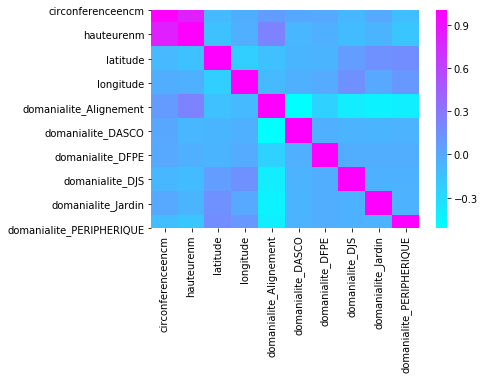

In [29]:
# I visualize the correlation between those features
sns.heatmap(new_trees.corr(), cmap = 'cool')

# Modelling without the 'stadededevelopement' feature

In [30]:
# I focus on the numeric series by assigning the new_X dataset without 'stadedeveloppement' feature
new_X = new_trees.drop(columns = ['libellefrancais','espece','stadedeveloppement'])
display(new_X)

,circonferenceencm,hauteurenm,latitude,longitude,domanialite_Alignement,domanialite_DASCO,domanialite_DFPE,domanialite_DJS,domanialite_Jardin,domanialite_PERIPHERIQUE
0,35.0,5.0,48.896627,2.392798,1,0,0,0,0,0
2,35.0,4.0,48.899748,2.381109,1,0,0,0,0,0
5,45.0,5.0,48.884806,2.390669,0,1,0,0,0,0
7,75.0,10.0,48.896341,2.378369,1,0,0,0,0,0
10,120.0,10.0,48.890593,2.399003,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14317,150.0,15.0,48.889867,2.379310,0,1,0,0,0,0
14318,100.0,15.0,48.888527,2.391510,1,0,0,0,0,0
14319,150.0,20.0,48.884311,2.391012,1,0,0,0,0,0
14320,170.0,18.0,48.895184,2.384701,1,0,0,0,0,0


In [31]:
# I check the types of values of X to be sure all are numeric
new_X.dtypes

circonferenceencm           float64
hauteurenm                  float64
latitude                    float64
longitude                   float64
domanialite_Alignement        uint8
domanialite_DASCO             uint8
domanialite_DFPE              uint8
domanialite_DJS               uint8
domanialite_Jardin            uint8
domanialite_PERIPHERIQUE      uint8
dtype: object

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [33]:
new_stscaler = StandardScaler().fit(new_X)
new_trees_scale = new_stscaler.transform(new_X)

In [34]:
display(new_trees_scale[0])

array([-1.03942263, -1.0073054 ,  1.35415543,  0.86826838,  0.52951964,
       -0.2688106 , -0.12452855, -0.2100865 , -0.2262314 , -0.21800278])

In [35]:
new_kmeans = KMeans(n_clusters = 4)
new_trees_kmeans = new_kmeans.fit(new_trees_scale)

new_trees['new_labels'] = new_trees_kmeans.labels_
new_trees['new_labels'].value_counts(ascending = True)

3     609
1    1358
2    2650
0    4420
Name: new_labels, dtype: int64

In [36]:
new_trees.groupby("new_labels").mean()

,circonferenceencm,hauteurenm,latitude,longitude,domanialite_Alignement,domanialite_DASCO,domanialite_DFPE,domanialite_DJS,domanialite_Jardin,domanialite_PERIPHERIQUE
new_labels,,,,,,,,,,
0,62.424661,8.109276,48.886228,2.383550,1.000000,0.0,0.00000,0.000000,0.000000,0.000000
1,76.492636,8.048601,48.890216,2.387290,0.000000,0.0,0.10162,0.280560,0.315906,0.301915
2,150.181509,18.569057,48.885866,2.382991,0.995472,0.0,0.00000,0.000377,0.004151,0.000000
3,95.844007,9.440066,48.884667,2.382454,0.000000,1.0,0.00000,0.000000,0.000000,0.000000


In [37]:
from sklearn.metrics import silhouette_score

score = silhouette_score(new_X, new_trees.new_labels, metric='euclidean')
print('The silhouette score with KMeans model is', score)

The silhouette score with KMeans model is 0.14819300037654703


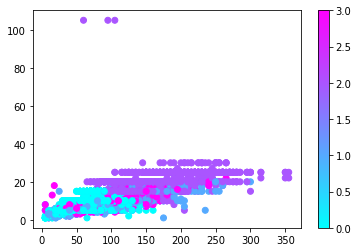

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_trees['circonferenceencm'], new_trees['hauteurenm'], c= new_trees['new_labels'], cmap = 'cool')
plt.colorbar(scatter)

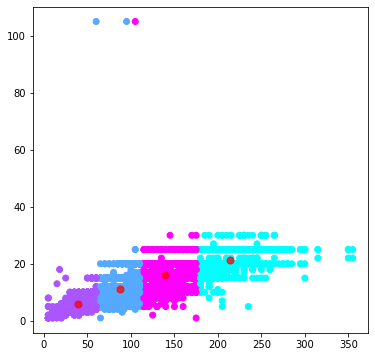

In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(new_X)
y_pred = kmeans.predict(new_X)

plt.figure(figsize=(6,6))
plt.scatter(new_X['circonferenceencm'], new_X['hauteurenm'], c=y_pred, cmap = 'cool')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)

plt.show()

In [62]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

#X, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0)

X = np.c_[new_X, 0.5 * np.random.randn(new_X.shape[0], 1)]

rot = R.from_euler('new_labels', 45, degrees=True)
X = rot.apply(new_X)

ValueError: Expected axis specification to be a non-empty string of upto 3 characters, got new_labels

TypeError: '(slice(None, None, None), 0)' is an invalid key

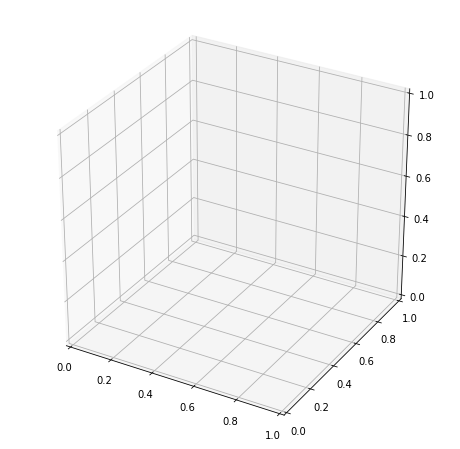

In [41]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)

ax.view_init(elev=20, azim=65)
plt.show()

In [42]:
dbscan = DBSCAN(eps = 0.9)
trees_dbscan = dbscan.fit(new_trees_scale)
trees['labels_DBSCAN'] = trees_dbscan.labels_
trees['labels_DBSCAN'].value_counts(ascending = True)

 13       7
 12      10
 5       18
 11      23
 8       44
-1       56
 10      86
 9      106
 2      155
 6      179
 7      213
 4      224
 3      262
 1      604
 0     7050
Name: labels_DBSCAN, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF81D51248>],
      dtype=object)

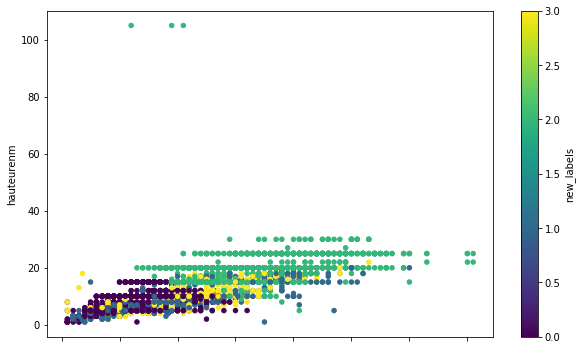

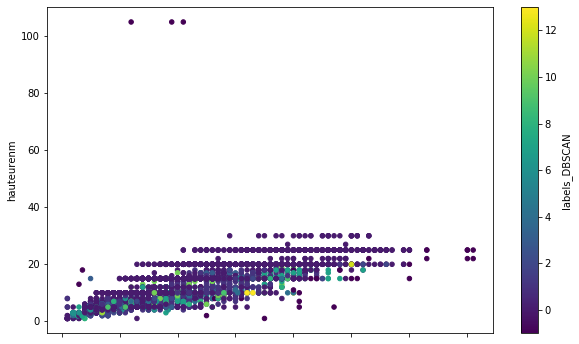

In [43]:
new_trees.plot.scatter(subplots=True, figsize=(10, 6), x="circonferenceencm", y="hauteurenm", c="new_labels", colormap="viridis")
trees.plot.scatter(subplots=True, figsize=(10, 6), x="circonferenceencm", y="hauteurenm", c="labels_DBSCAN", colormap="viridis")

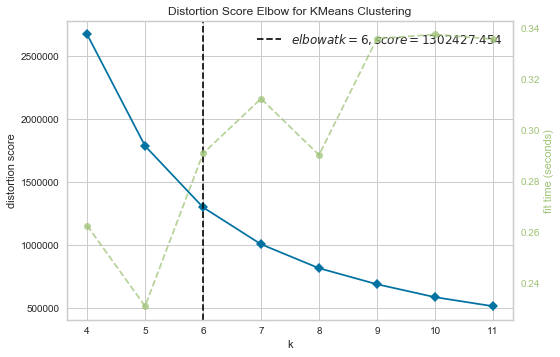

In [44]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(new_X)
visualizer.poof()

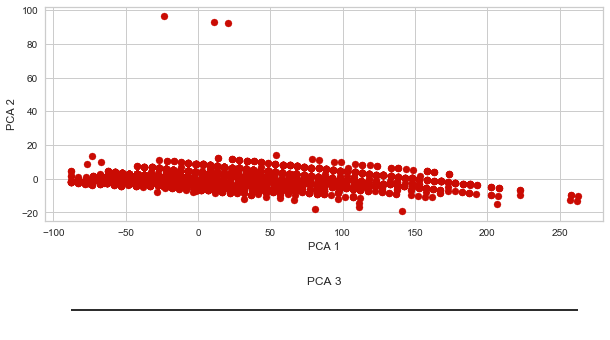

In [59]:
from sklearn.decomposition import PCA

#Principal Component Analysis(PCA) as a dimensionality reduction algorithm. 
#We can also use it to rotate the Cartesian coordinate space. 
#Here, the idea is only to rotate them which would help decision tree splits in typical tree-based models.

pca = PCA()
pca.fit(new_X)
pca_X = pca.transform(new_X)

fig = plt.figure(figsize=(10, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X[:, 0], pca_X[:, 1], c = 'r')
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=2)
ax[1].hlines(1, -7, 10)
y = np.ones(new_X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

In [ ]:
#trees.to_csv(r'../trees.csv')